#### -accuracy vs. Temp (and spread) for three categories of variables 

In [1]:
import os
import numpy as np
import pandas as pd
import glob
import json
# import sklearn.model_selection as ms
# from sklearn import metrics
# import xgboost as xgb
import matplotlib.pyplot as plt
import matplotlib
import time

In [2]:
# import matplotlib as mpl
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True
})



For each spread, three different categories in one plot 

In [3]:
dir_plot = "/Users/hkim78/work/HotJupiter/plot/atmosphere-uncertainty/machine_learning/2021/"
data_dir = "/Users/hkim78/work/HotJupiter/ML/results/accuracy/2021/"

mean_temp = np.arange(400, 2100, 100)

legend_label = {"g":"G", 
                "ab": "Abundance", 
                "topo":"Topology", 
                "g_ab": "G + Abundance", 
                "g_topo": "G + Topology", 
                'topo_ab':"Topology + Abundance", 
                'g_topo_ab': "G + Topology + Abundance",
                'degree': r'$\langle k \rangle$', 
                'cc': r'$\langle C \rangle$',
                'spl': r'$\langle \ell \rangle$' , 
                'neighbor': r'$\langle k_{nn} \rangle$',
                'betw': r'$\langle g(v) \rangle$', 
                'edgebetw': r'$\langle g(e) \rangle$',
                'g_degree': "G + %s"%r'$\langle k \rangle$',
                'g_cc': "G + %s"%r'$\langle C \rangle$', 
                'g_spl': "G + %s"%r'$\langle \ell \rangle$', 
                'g_neighbor': "G + %s"%r'$\langle k_{nn} \rangle$', 
                'g_betw': "G + %s"%r'$\langle g(v) \rangle$', 
                'g_edgebetw': "G + %s"%r'$\langle g(e) \rangle$', 
                "CH4": r"$\mathrm{CH}_4$", 
                "CO": r"$\mathrm{CO}$", 
                "H2O": r"$\mathrm{H_2O}$", 
                "NH3": r"$\mathrm{NH}_3$",
                'g_CO': "G + %s"%r"$\mathrm{CO}$", 
                'g_CH4': "G + %s"%r"$\mathrm{CH}_4$",
                'g_NH3': "G + %s"%r"$\mathrm{NH}_3$",
                'g_H2O': "G + %s"%r"$\mathrm{H_2O}$"
                }

individual_group = ['g', 'topo', 'ab']
group_combination = ['topo_ab', 'g_topo', 'g_ab']
three_group = ['g_topo_ab']
simple_topo = ['degree', 'cc']
complex_topo = ['spl', 'neighbor']
betweenness = ['betw', 'edgebetw']
g_individual_topology = ['g_degree','g_cc', 'g_spl', 'g_neighbor', 'g_betw', 'g_edgebetw']
individual_abundance = ["CH4", "CO", "H2O", "NH3"]
g_individual_abundance = ['g_CO', 'g_CH4','g_NH3','g_H2O']
individual_topology = simple_topo + complex_topo + betweenness
individual_features = ['g'] + individual_abundance + individual_topology


<ipython-input-8-25d7d87ebee9>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(5, 3, j)


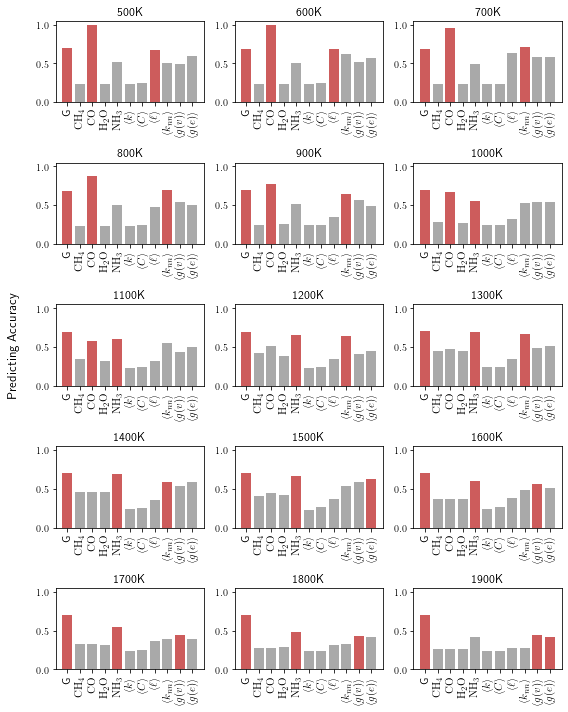

In [8]:

### all individual variables 

selected = 3 #nth highest accuracy

for spread in ["50"]:#, "250", "500"]:

    
    list_temp = np.arange(400, 2100, 100)

    dict_temp_feature = dict()
    for temp_index in range(len(list_temp)):
        dict_temp_feature[temp_index] = dict()

    for feature_group in individual_features:      
        input_path = data_dir + "accuracy_%s.json"%feature_group
        with open(input_path) as infile:
            a = json.load(infile)
        for temp_index in range(len(list_temp)):
            dict_temp_feature[temp_index][feature_group] = a[spread][temp_index]      

    plt.figure(figsize=(8, 10))

    j = 1
    for temp_index in np.arange(1, len(list_temp)-1):   
        for feature_group in legend_label.keys(): 

            plt.subplot(5, 3, j)

            # identify the 3 highest predictive variables  
            sorted_list = sorted(dict_temp_feature[temp_index].values())
            selected_value = sorted_list[-selected]
            clrs = ['darkgrey' if (x < selected_value) else 'indianred' for x in dict_temp_feature[temp_index].values()]
            feature_label = [legend_label[x] for x in dict_temp_feature[temp_index].keys()]
            
            # bar plots 
            plt.bar(feature_label,  dict_temp_feature[temp_index].values(), color=clrs)
            
            # axis configuration 
            plt.ylim([0.0,1.05])
            plt.xticks(fontsize = 11, rotation=90)
            plt.yticks(fontsize= 10)
            
            # subplot titles for the mean temperature 
            plt.title("%sK"%(list_temp[temp_index]))
            
            if j == 7: 
                plt.ylabel("Predicting Accuracy\n", fontsize = 13)
                
        j += 1

    plt.tight_layout()

    plt.savefig(dir_plot + "/png-files/barplot_accuracy_spread_%s_all_individual_var.png"%spread, dpi=300)
    plt.savefig(dir_plot + "/pdf-files/barplot_accuracy_spread_%s_all_individual_var.pdf"%spread)
    plt.show()
    

